<a href="https://colab.research.google.com/github/Chocoding1/Machine_Learning_Deep_Learning/blob/main/08_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **합성곱 신경망의 시각화**

이번 절에서는 합성곱 층이 이미지에서 어떤 것을 학습했는지 알아보기 위해 합성곱 층의 가중치와 특성 맵을 그림으로 시각화해보자.

지금까지는 케라스의 Sequential 클래스만 사용했는데, 케라스는 좀 더 복잡한 모델을 만들 수 있는 함수형 API를 제공한다. 함수형 API가 무엇인지 할펴보고 합성곱 층의 특성 맵을 시각화해보는 데 사용해보자.

이번 절에서는 이전 절에서 훈련했던 합성곱 신경망의 체크포인트 파일을 사용한다. 이 파일은 최적의 에포크까지 훈련한 모델 파라미터를 저장하고 있다.

## 가중치 시각화

합성곱 층은 여러 개의 필터를 사용해 이미지에서 특징을 학습한다. 각 필터는 커널이라 부르는 가중치와 절편을 가지고 있다. 일반적으로 절편은 시각적으로 의미가 있지 않다. 가중치는 입력 이미지의 2차원 영역에 적용되어 어떤 특징을 크게 두드러지게 표현하는 역할을 한다.

예를 들어 다음과 같은 가중치는 둥근 모서리가 있는 영역에서 크게 활성화되고 그렇지 않은 영역에서는 낮은 값을 만들 것이다.<br>
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F7ynvi%2Fbtq2DruA7Yz%2F1JQefh2uQKG3lnKUq0IGgK%2Fimg.png" weight=300 height=300><br>
이 필터의 가운데 곡선 부분의 가중치 값은 높고 그 외 부분의 가중치 값은 낮을 것이다. 그렇게 해야 둥근 모서리가 있는 입력과 곱해져서 큰 출력을 만들기 때문이다.

2절에서 훈련한 최적의 모델 파라미터를 불러오기 전에 2절의 코드에서 best-cnn-model.h5 파일을 생성해야 한다.

이를 위해 2절의 코드에서 best-cnn-model.h5 파일을 생성 후 다운로드하여 사용하겠다.

In [1]:
# 모델 파라미터 불러오기
from tensorflow import keras

model = keras.models.load_model('best-cnn-model.h5')

In [2]:
# 케라스 모델의 층 확인
model.layers # layers 속성에 저장되어 있고, 이 속성은 파이썬 리스트이다.

이제 첫 번째 합성곱 층의 가중치를 조사해보자.<br>
층의 가중치와 절편은 층의 weights 속성에 저장되어 있다. weights도 파이썬 리스트<br>
layers 속성의 첫 번째 원소를 선택해 weights의 첫 번째 원소(가중치)와 두 번째 원소(절편)의 크기를 출력해보자.

In [3]:
conv = model.layers[0] # 첫 번째 합성곱 층
print(conv)
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


첫 번째 합성곱 층의 커널 크기는 (3, 3)이었고, 필터 개수는 32개였다. 또한 합성곱 층에 전달되는 입력의 깊이가 1이므로 위의 결과가 올바른 값이다.

weights 속성은 텐서플로의 다차원 배열인 Tensor 클래스의 객체이다. 여기서는 다루기 쉽도록 numpy() 메서드를 사용해 넘파이 배열로 변환하겠다.<br>
그 다음 가중치 배열의 평균과 표준편차를 계산해보자.

In [4]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std()) # numpy의 mean(), std() 사용

-0.04398866 0.3172991


위 가중치의 평균은 0에 가깝고 표준편차는 0.32 정도이다. 나중에 이 값을 훈련하기 전의 가중치와 비교해볼 예정이다.

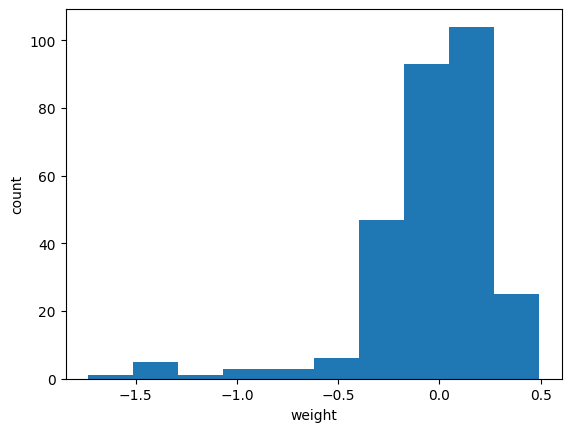

In [5]:
# 가중치의 분포를 직관적으로 보기 위해 히스토그램을 그려보자.
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

matplotlib의 hist() 함수에는 히스토그램을 그리기 위해 1차원 배열로 전달해야 한다. 이를 위해 conv_weights 배열을 1개의 열이 있는 배열로 변환했다.

히스토그램을 보면 0을 중심으로 분포를 띠고 있는 것을 알 수 있다. 이 또한 나중에 훈련하기 전의 가중치와 비교할 것이다.

이번에는 32개의 커널을 출력해보자.

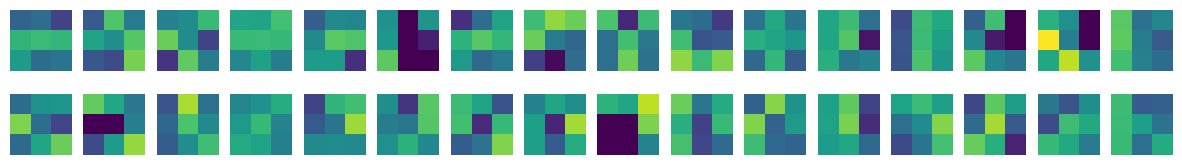

In [6]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    # conv_weights.shape : (3, 3, 1, 32)
    axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

imshow() 함수는 배열에 있는 최댓값과 최솟값을 사용해 픽셀의 강도를 표현한다. 즉 값이 0.1이던 0.4이던 그 배열의 최댓값이면 가장 밝은 노란색으로 그린다. 만약 두 배열을 imshow() 함수로 비교하려면 바람직하지 않다. 어떤 절댓값으로 기준을 정해서 픽셀의 강도를 나타내야 비교하기 좋기 때문이다.<br>
이를 위해 위 코드에서 vmin과 vmax로 matplotlib의 컬러맵으로 표현할 범위를 지정했다.

결과 그래프를 보면 이 가중치 값이 무작위로 나열된 것이 아닌 어떤 패턴을 볼 수 있다. 예를 들어 첫 번째 줄의 맨 왼쪽 가중치는 오른쪽 3픽셀의 값이 높다(밝은 부분의 값이 높다). 이 가중치는 오른쪽에 놓인 직선을 만나면 크게 활성화될 것이다.

이번에는 훈련하지 않은 빈 합성곱 신경망을 만들어보자. 그리고 이 합성곱 층에서 가중치가 위에서 본 훈련한 가중치와 어떻게 다른지 그림으로 비교해보자.

In [7]:
# Sequential 클래스로 모델 만들고 Conv2D 층 하나 추가
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [8]:
# 이 모델의 첫 번째 층(Conv2D 층)의 가중치(절편 x)를 저장
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


이 모델도 동일하게 (3, 3) 커널을 가진 필터를 32개 사용했기 때문에 가중치의 크기도 앞서 그래프로 출력한 가중치와 같다.

In [9]:
# 이 가중치의 평균과 표준편차 계산
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.004890033 0.08290175


평균은 이전과 동일하게 0에 가깝지만, 표준편차는 이전과 달리 매우 작다.

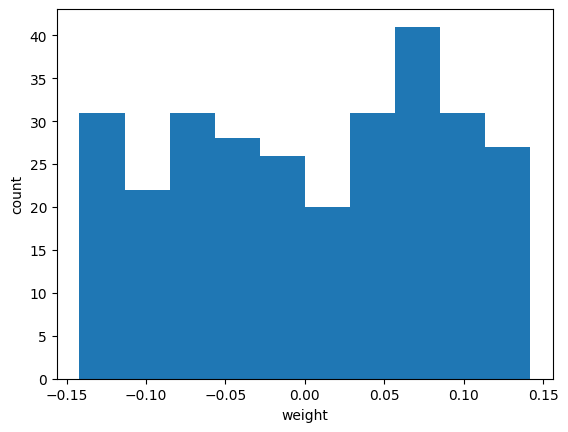

In [10]:
# 가중치 배열 히스토그램으로 표현
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

확실히 이전 그래프와 다르다. 대부분의 가중치가 -0.15~0.15 사이에 있고, 비교적 고른 분포를 보인다.<br>
이런 이유는 텐서플로가 신경망의 가중치를 처음 초기화할 떄 균등 분포에서 랜덤하게 값을 선택하기 때문이다.

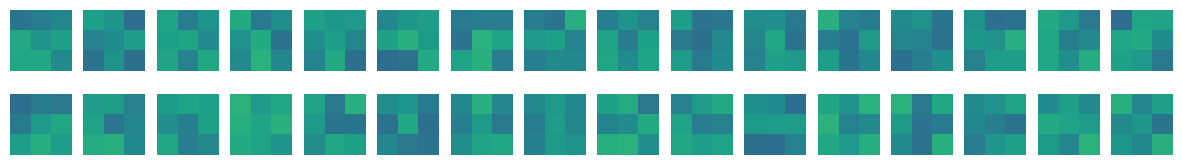

In [11]:
# 해당 가중치 값을 이전처럼 그림으로 출력
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    # 위의 학습된 가중치와 비교하기 위해 동일하게 vmin과 vmax를 -0.5와 0.5로 설정
    axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

학습된 가중치와 비교했을 때 전체적으로 학습이 안 된 가중치들이 밋밋하게 출력되었다. 이를 통해 합성곱 신경망이 패션 MNIST 데이터셋의 분류 정확도를 높이기 위해 유용한 패턴을 학습했다는 사실을 알 수 있다.

합성곱 신경망의 학습을 시각화하는 두 번째 방법은 합성곱 층에서 출력된 특성 맵을 그려 보는 것이다. 이를 통해 입력 이미지를 신경망 층이 어떻게 바라보는지 엿볼 수 있다.

합성곱 층의 출력을 만들기 전에 함수형 API에 대해 알아보자.

## 함수형 API

지금까지는 신경망 모델을 만들 때 케라스 Sequential 클래스를 사용했다. 딥러닝에는 좀 더 복잡한 모델이 많이 존재한다. 예를 들면 입력이 2개라던가, 출력이 2개라던가.. 이런 경우는 Sequential 클래스를 사용하기 어렵다.

대신 **함수형 API**를 사용한다.<br>
함수형 API는 케라스의 Model 클래스를 사용하여 모델을 만든다.<br>
간단한 예로 7장에서 만들었던 Dense 층 2개로 이루어진 완전 연결 신경망을 함수형 API로 구현해보자.<br>
먼저 2개의 Dense 층 객체를 생성하자.
```
dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')
```
위의 코드는 7장과 동일. 이 객체를 Sequential 클래스 객체의 add() 메서드에 전달할 수 있지만, 다음과 같이 함수처럼 호출할 수도 있다.
```
hidden = dense1(inputs)
```
사실 파이썬의 모든 객체는 호출 가능하다. 따라서 케라스의 층 객체도 함수처럼 호출했을 때 적절히 동작할 수 있다.<br>
앞의 코드를 실행하면 입력값 inputs를 Dense 층에 통과시킨 후 출력값 hidden을 만들어준다.<br>
그럼 이제 두 번째 층을 호출하는데, 이때는 첫 번째 층의 출력을 입력으로 사용한다.
```
outputs = dense2(hidden)
```
그다음 inputs와 outputs을 Model 클래스로 연결해주면 된다.
```
model = keras.Model(inputs, outputs)
```
즉 입력에서 출력까지 층을 호출한 결과를 계속 이어주고 Model 클래스에 입력과 최종 출력을 지정한다.<br>
그런데 inputs은 어디서 온 건가..?<br>
이전 절에서 plot_model() 함수로 모델의 층을 도식화했을 때 InputLayer 클래스가 맨 처음에 나왔었는데, Sequential 클래스는 InputLayer 클래스를 자동으로 추가하고 호출해 주지만 Model 클래스에서는 우리가 수동으로 만들어서 호출해야 한다.<br>
따라서 inputs가 InputLayer 클래스의 출력값이 되어야 한다.

note) InputLayer의 객체는 어디에??<br>
케라스 모델은 layers 속성 외에 InputLayer 객체를 포함한 _layers 리스트 속성을 따로 가지고 있는데, Sequential 클래스 객체의 _layers 속성의 첫 번째 항목이 바로 InputLayer 클래스의 객체이다.<br>
InputLayer 클래스는 신경망의 입력층 역할을 한다. 즉 모델의 입력을 첫 번째 은닉층에 단순히 전달하는 역할을 한다. 따라서 InputLayer 객체의 입력과 출력은 동일하다.

케라스는 InputLayer 클래스 객체를 쉽게 다룰 수 있도록 Input() 함수를 별도로 제공하는데, 입력의 크기를 지정하는 shape 매개변수와 함께 이 함수를 호출하면 InputLayer 클래스 객체를 만들어 출력을 반환해준다.

In [12]:
inputs = keras.Input(shape=(784,))

전체를 합쳐 보면 다음과 같다.
```
inputs = keras.Input(shape=(784,))
hidden = dense1(inputs)
outputs = dense2(hidden)
model = keras.Model(inputs, outputs)
```
이렇게 모델을 만들면 중간에 다양한 형태로 층을 연결할 수 있다. 그런데 특성 맵 시각화를 만드는 데 함수형 API가 왜 필요할까?

이전 절에서 정의한 model 객체의 층을 순서대로 나열하면 다음과 같다.<br>
model 객체 -> InputLayer -> Conv2D -> Maxpooling2D -> Conv2D -> Maxpooing2D -> Flatten -> Dense -> Dropout -> Dense<br>
우리가 필요한 것은 첫 번째 Conv2D의 출력이다. model 객체의 입력과 Conv2D의 출력을 알 수 있다면 이 둘을 연결하여 새로운 모델을 얻을 수 있지 않을까?

model 객체의 predict() 메서드를 호출하면 입력부터 마지막 층까지 모든 계산을 수행한 후 최종 출력을 반환한다. 하지만 우리가 필요한 것은 첫 번째 Conv2D 층이 출력한 특성 맵. 첫 번째 층의 출력은 Conv2D 객체의 output 속성에서 얻을 수 있다.(model.layers[0].output)<br>
model 객체의 입력은 어떻게 얻을 수 있을까?<br>
케라스 모델은 input 속성으로 입력을 참조할 수 있다. 즉 model.input으로 이 모델의 입력을 간단히 얻을 수 있다.

In [13]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


이제 model.input과 model.layers[0].output을 연결하는 새로운 conv_acti 모델을 만들 수 있다.

In [14]:
conv_acti = keras.Model(model.input, model.layers[0].output)

model 객체의 predict() 메서드를 호출하면 최종 출력층의 확률을 반환한다. 그러나
conv_acti의 predict() 메서드를 호출하며 첫 번째 Conv2D의 출력을 반환할 것이다.

이제 준비가 끝났으니 특성 맵을 시각화해보자.

## 특성 맵 시각화

4422102/4422102 [==============================] - 1s 0us/step


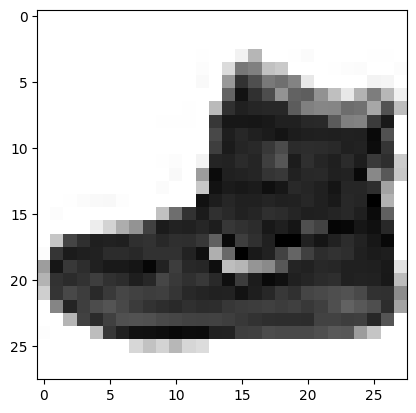

In [15]:
# 패션 MNIST 데이터셋을 읽어와 훈련 세트에 있는 첫 번째 샘플 그리기
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

위 샘플을 conv_acti 모델에 주입하여 Conv2D 층이 만드는 특성 맵을 출력해보자.

2절에서도 말했지만 predict() 메서드는 항상 입력의 첫 번째 차원이 배치 차원일 것으로 기대하기 때문에 하나의 샘플을 전달하더라도 꼭 첫 번째 차원을 유지해야 한다. 이를 위해 슬라이싱 연산자를 사용한다.

In [19]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti(inputs)

In [20]:
# conv_acti.predict()가 출력한 feature_maps의 크기 확인
print(feature_maps.shape)

(1, 28, 28, 32)


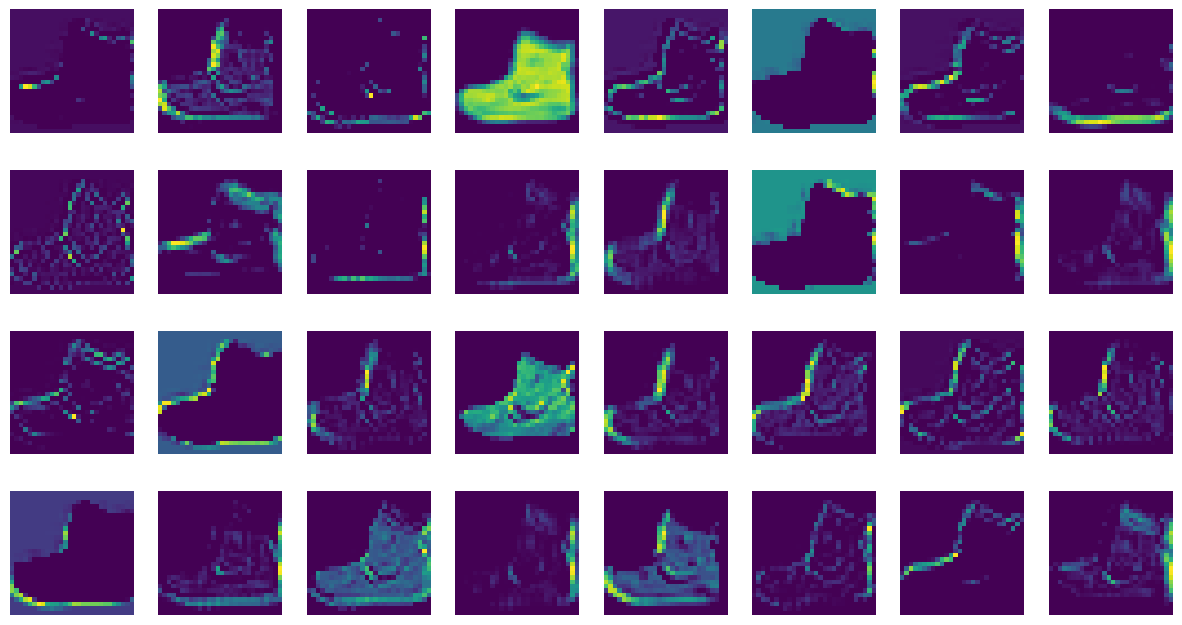

In [21]:
# 특성 맵 그리기
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i,j].axis('off')
plt.show()

이 특성 맵은 32개의 필터로 인해 입력 이미지에서 강하게 활성화된 부분을 보여준다.

두 번째 합성곱 층이 만든 특성 맵도 확인해보자.

In [26]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [29]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 22ms/step


In [30]:
print(feature_maps.shape)

(1, 14, 14, 64)


두 번째 합성곱 층을 지난 결과가 맞다.

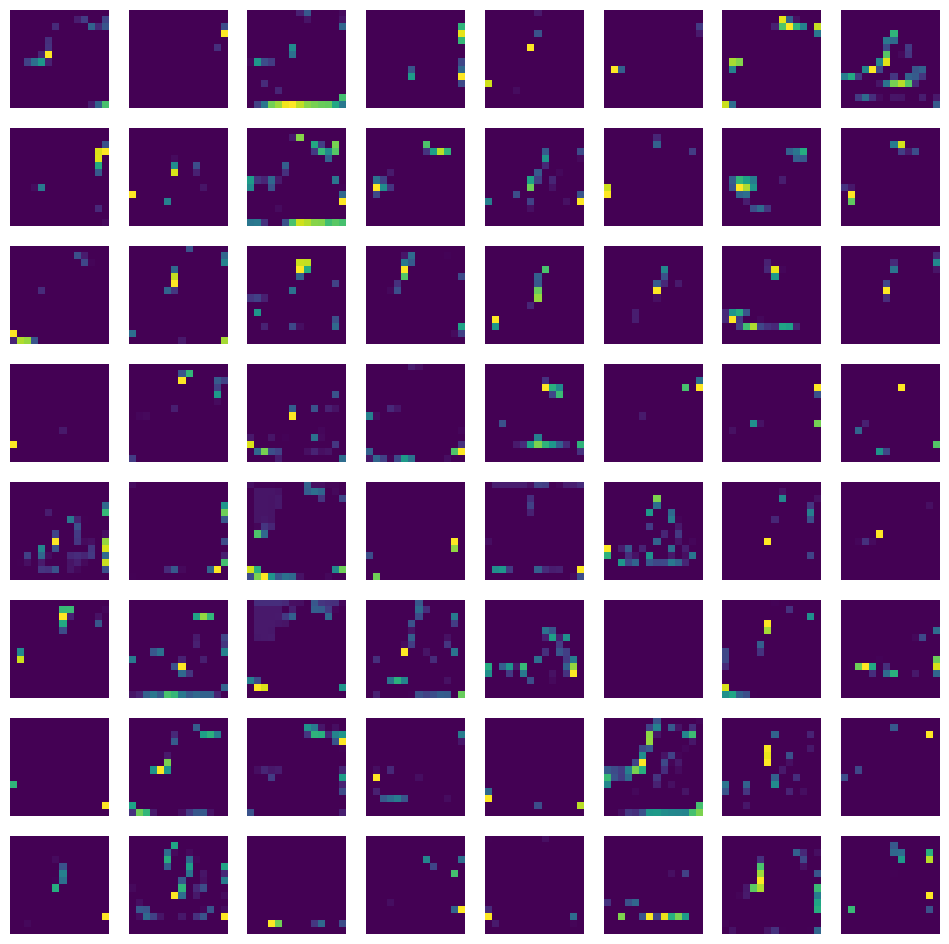

In [31]:
# 64개의 특성 맵을 8개씩 나누어 출력해보자.
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i,j].axis('off')
plt.show()

첫 번째 합성곱 층의 특성 맵과 달리 시각적으로 이해하기 어렵다. 왜 그럴까?

두 번째 합성곱 층의 필터는 첫 번째 필터가 앞서 출력한 32개의 특성 맵과 곱해지기 때문에 (14, 14, 32) 특성 맵에서 어떤 부위를 감지하는지 직관적으로 이해하기가 어렵다.

이를 바꾸어 생각하면 합성곱 신경망의 앞부분에 있는 합성곱 층은 이미지의 **시각적인 정보**를 감지하고 뒤쪽에 있는 합성곱 층은 앞쪽에서 감지한 시각적인 정보를 바탕으로 **추상적인 정보**를 학습한다고 볼 수 있다.<br>
이런 현상은 합성곱 층을 많이 쌓을수록 심해진다.

합성곱 신경망이 패션 MNIST 이미지를 인식하여 10개의 클래스를 찾아낼 수 있는 이유가 여기 있다.

<정리><br>
입력에 가까운 합성곱 층은 이미지에서 시각적인 정보나 패턴을 감지하도록 훈련되고, 이어지는 합성곱 층은 이런 시각적인 정보를 활용해 조금 더 고차원적인 개념을 학습한다.